In this, I am just studying how comvolution works. that's all. Just making a slight change to use `numpy` instead

In [1]:
!wget -O .R.jpeg https://cdn.britannica.com/43/188743-050-5F747B9C/Kofi-Annan-2008.jpg


--2024-02-16 09:56:38--  https://cdn.britannica.com/43/188743-050-5F747B9C/Kofi-Annan-2008.jpg
Resolving cdn.britannica.com (cdn.britannica.com)... 99.84.252.95, 99.84.252.14, 99.84.252.94, ...
Connecting to cdn.britannica.com (cdn.britannica.com)|99.84.252.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 199239 (195K) [image/jpeg]
Saving to: ‘R.jpeg’

R.jpeg              100%[===================>] 194.57K  --.-KB/s    in 0.06s   

2024-02-16 09:56:38 (3.39 MB/s) - ‘R.jpeg’ saved [199239/199239]



In [2]:
import numpy as np

a = np.linspace(2, 6, 3)
b = np.linspace(3, 9, 3)
c = np.convolve(a, b)
a, b, c

(array([2., 4., 6.]), array([3., 6., 9.]), array([ 6., 24., 60., 72., 54.]))

|$*$| 2 | 4| 6|
|--|---|---|---|
|3|06|12|18|
|6|12|24|36|
|9|18|36|54|


A * B = sum of diagonals = [06, 10+12, 18+24+12, 36+36, 54]

let apply this to an image given a 3x3 kernel size

(1600, 1210, 3)


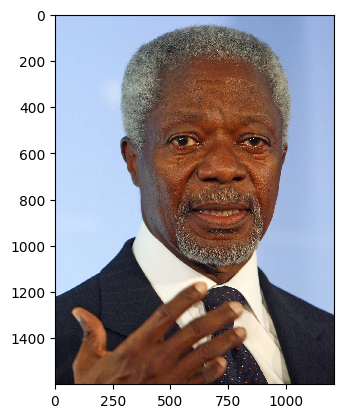

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = ".R.jpeg"
img = Image.open(image_path)
img = np.array(img)
print(img.shape)
plt.imshow(img, interpolation="nearest")

(1600, 1210) (1600, 1210)


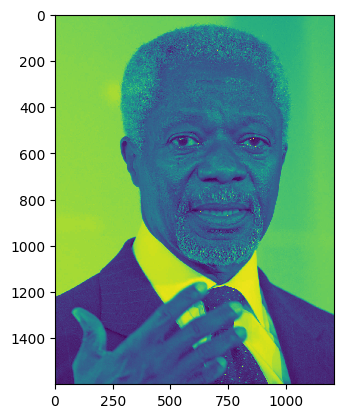

In [4]:
i = img @ [0.299, 0.587, 0.114]
print(i.shape, img[:, :, 1].shape)

#its supposed to be gray right? Ha 😲.
plt.imshow(i, interpolation="nearest")

(3, 3) [[0.16666667 0.33333333 0.5       ]
 [0.16666667 0.33333333 0.5       ]
 [0.16666667 0.33333333 0.5       ]]


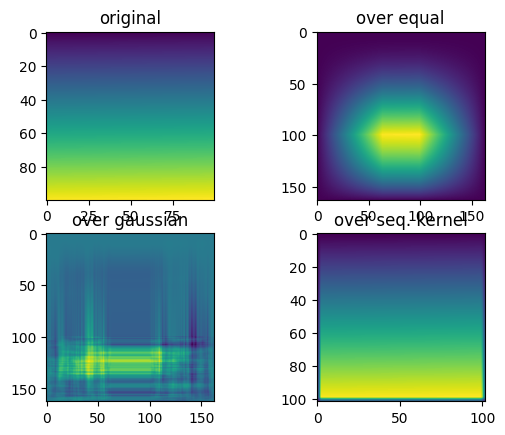

In [5]:
from scipy import signal
kernal_shape = (64,64)
arr = np.linspace(0, 10, 10001)
arr = arr[:10000].reshape(100, 100)
a = plt.subplot(2, 2, 1)
a.imshow(arr)
a.set_title("original")

b = plt.subplot(2, 2, 2)
b.set_title("over equal")
k = np.ones(kernal_shape) * np.pi
res = signal.convolve(arr, k)
b.imshow(res)


c = plt.subplot(2, 2, 3)
c.set_title("over gaussian")
k = np.random.randn(*kernal_shape)
res = signal.convolve(arr, k)
c.imshow(res)

d = plt.subplot(2, 2, 4)
d.set_title("over seq. kernel")
k = np.array([[1], [2], [3]])
k = np.array([[1, 2, 3]])
k = np.tile(k, (3, 1)) / np.sum(k)
res = signal.convolve(arr, k)
d.imshow(res)
print(k.shape, k)

# res.shape, arr

shape: (32, 32)
shape: (32, 32)


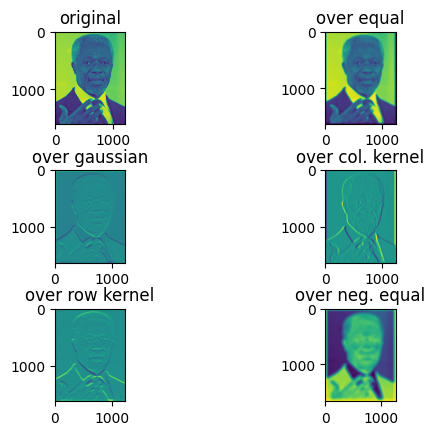

In [6]:
from scipy import signal

arr = np.dot(img, np.ones(3)/3)
# gray_img = np.dot(img, [0,-0.5,0])
# res = signal.convolve(gray_img, k)
plt.subplots_adjust(hspace=0.5)

kernel_shape = (32,32)
a = plt.subplot(3, 2, 1)
a.imshow(arr)
a.set_title("original")

b = plt.subplot(3, 2, 2)
b.set_title("over equal")
k = np.ones(kernel_shape) * np.pi
res = signal.convolve(arr, k)
b.imshow(res)


c = plt.subplot(3, 2, 3)
c.set_title("over gaussian")
k = np.random.randn(*kernel_shape) # randn isn't a perfect gaussian tho
res = signal.convolve(arr, k)
c.imshow(res)

d = plt.subplot(3, 2, 4)
d.set_title("over col. kernel")
k = np.linspace(-kernel_shape[0],kernel_shape[0], kernel_shape[0])
# k = np.array([[-1, 0, 1]]) * np.pi
k = np.tile(k, (kernel_shape[1], 1)) #/ np.sum(k)
print("shape:", k.shape)
res = signal.convolve(arr, k)
d.imshow(res)

d = plt.subplot(3, 2, 5)
d.set_title("over row kernel")
k = np.linspace(-kernel_shape[0],kernel_shape[0], kernel_shape[0]).reshape(-1, 1)
k = np.tile(k, (1, kernel_shape[1])) #/ np.sum(k)
print("shape:", k.shape)
res = signal.convolve(arr, k)
d.imshow(res)
# res.shape, arr


b = plt.subplot(3, 2, 6)
b.set_title("over neg. equal")
k = np.ones(kernal_shape) * -np.pi
res = signal.convolve(arr, k)
b.imshow(res)

Our gaussian isn't a true gaussian filter
ussually the gaussian filter used in bluring and smoothening is
```python
array([[1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]])
```

0.014305744525198413 1.0


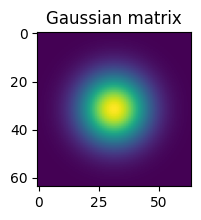

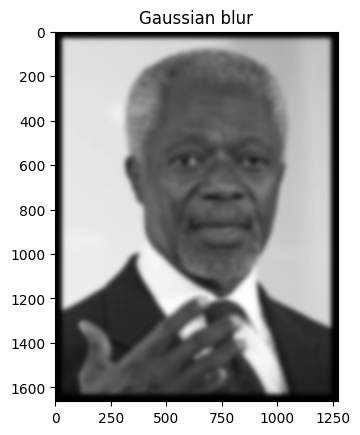

In [7]:
from scipy import signal

## Smoothengin and bluring
kernel_shape = (64,64)
gray_img = np.dot(img, np.ones(3)/3)





# Create a 1D Gaussian kernel
kernel_size = 64
sigma = 10 # standard deviation
kernel1d = np.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
kernel1d = np.exp(-0.5 * (kernel1d / sigma) ** 2)
kernel1d = kernel1d / kernel1d.sum()

# Create a 2D Gaussian-like filter using the outer product of the 1D kernel with itself
gaussian_filter = np.outer(kernel1d, kernel1d)
print(np.std(kernel1d), np.sum(kernel1d))

plt.figure(figsize=(2,2))
plt.title("Gaussian matrix")
plt.imshow(gaussian_filter, )
plt.show()

res = signal.convolve(gray_img, gaussian_filter)
plt.title("Gaussian blur")
plt.imshow(res, cmap='gray')
plt.show()


0.015824915109316447 0.9999999999999998 (32,)
(32,)
1.0850148626894056e-07 7.680671771439934e-06 (32, 32)


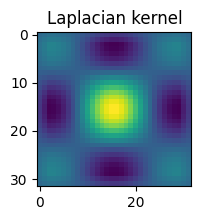

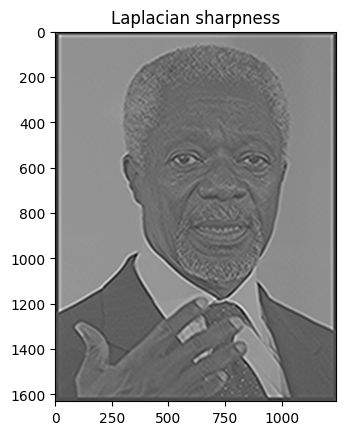

In [8]:
from scipy import signal

## Sharpening
gray_img = np.dot(img, np.ones(3)/3)

# Create a 1D Gaussian kernel
kernel_size = 32 #64
sigma = 8 # 32 # standard deviation
kernel1d = np.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
kernel1d = np.exp(-0.5 * (kernel1d / sigma) ** 2)
kernel1d = kernel1d / kernel1d.sum()
print(np.std(kernel1d), np.sum(kernel1d), kernel1d.shape)

# laplacian_filter
grad = np.gradient(np.gradient(kernel1d))
# Laplacian = div( grad F)
print(np.array(grad).shape)
laplacian_filter = np.outer(grad, grad) * 0.5
# laplacian_filter = np.array(div)

# Create a 2D Laplacian filter using the outer product of the 1D Laplacian kernel with itself
# laplacian_filter = np.outer(laplacian_kernel1d, laplacian_kernel1d)
print(np.std(laplacian_filter), np.sum(laplacian_filter), laplacian_filter.shape)


plt.figure(figsize=(2,2))
plt.title("Laplacian kernel") # I am not sure though
plt.imshow(laplacian_filter, )
plt.show()

res = signal.convolve(gray_img, laplacian_filter)
plt.title("Laplacian sharpness")
plt.imshow(res, cmap='gray')
plt.show()


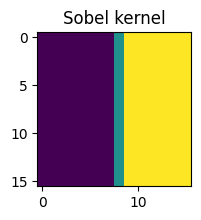

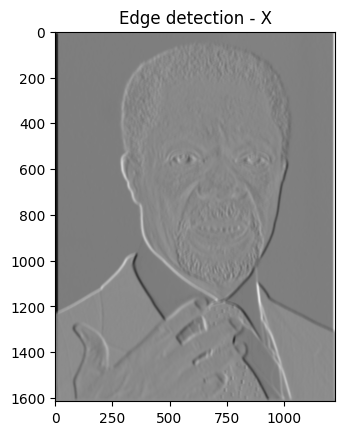

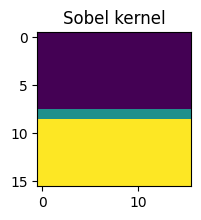

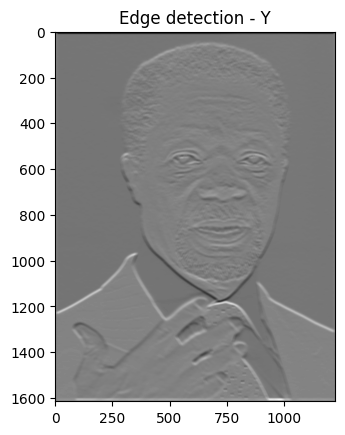

In [9]:
from scipy import signal

## Edge detection
gray_img = np.dot(img, np.ones(3)/3)
size = 16
half_size = size // 2
kernel = np.zeros((size, size))
kernel[:, :half_size] = -1
kernel[:, half_size + 1:] = 1
kernel_X = kernel

kernel = np.zeros((size, size))
kernel[:half_size, :] = -1
kernel[half_size + 1:, :] = 1
kernel_Y = kernel

sobel_filter = kernel_X
plt.figure(figsize=(2,2))
plt.title("Sobel kernel") # I am not sure though
plt.imshow(sobel_filter, )
plt.show()

res = signal.convolve(gray_img, sobel_filter)
plt.title("Edge detection - X")
plt.imshow(res, cmap='gray')
plt.show()

sobel_filter = kernel_Y
plt.figure(figsize=(2,2))
plt.title("Sobel kernel") # I am not sure though
plt.imshow(sobel_filter, )
plt.show()

res = signal.convolve(gray_img, sobel_filter)
plt.title("Edge detection - Y")
plt.imshow(res, cmap='gray')
plt.show()

### Note:
other than **Sobel filter**, other filters exist that emply convolution. However, a single __sobel filter__ is one of the easiest to write, so that's why its used here. Other kinds of filters:
- Prewitt
- Robert filters
- Gabor
- Scharr
- Marr-Hildreth (LoG)
- Frei-Chen Operator
- Kirsch Operator
- Roberts Cross Operator
- Canny Edge Operator
- Local Binary Pattern(LBP)
and more...

In many cases, a combination of filters or more advanced techniques, such as using a bank of Gabor filters, may be employed for robust texture analysis.



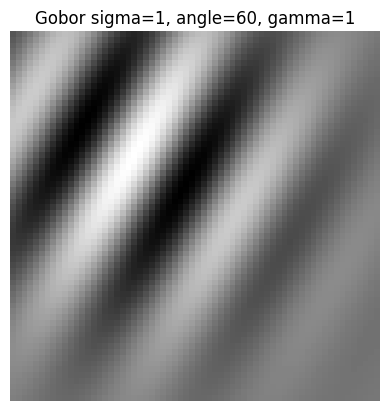

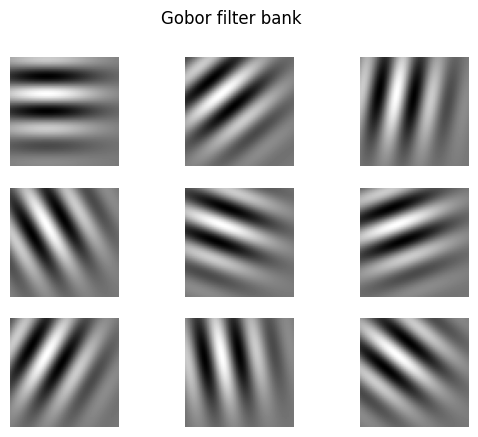

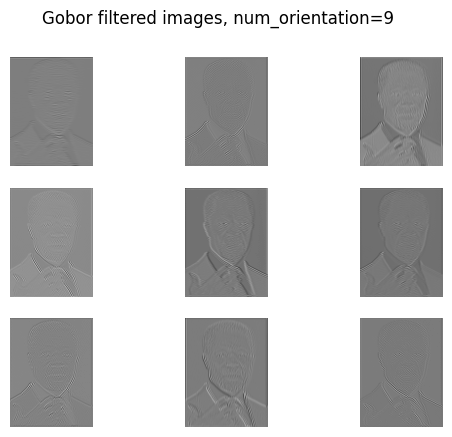

In [10]:
# Texture analysis using Convolution
size = 64
# frequency_range = (0.1, 0.3)
# using lambda (wavelength) instead,
# as in https://en.wikipedia.org/wiki/Gabor_filter
sigma = 1.0
gamma = 1.0

def create_filter(sigma, angle, gamma, kernel_size, Lambda=1, psi=0, ):
    sigma_x = sigma
    sigma_y = sigma / gamma
    nstds = 1.0
    theta = angle * (2*np.pi /360) # rotate at an angle, nor angle is in clockwise direcction

    xmax = max(
        abs(nstds * sigma_x * np.cos(theta)), abs(nstds * sigma_y * np.sin(theta))
    )


    xmax = np.ceil(max(1.0, xmax))

    ymax = max(
        abs(nstds * sigma_x * np.sin(theta)), abs(nstds * sigma_y * np.cos(theta))
    )
    ymax = np.ceil(max(1, ymax))
    (y, x) = np.meshgrid(np.linspace(-ymax, ymax + 1, kernel_size), np.linspace(-xmax, xmax + 1, kernel_size))

    # - angle: 0 - 360, clockwise direction
    # map = np.linspace(1, -1, kernel_size // 2) + np.linspace(-1, 1, kernel_size // 2)
    # map = np.linspace(1, -1, kernel_size)
    # x, y = np.meshgrid(map,map)
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)
    gb = np.exp(
        -0.5 * (x_theta**2 / sigma_x**2 + y_theta**2 / sigma_y**2)
    ) * np.cos(2 * np.pi / Lambda * x_theta + psi)
    return gb


gb = create_filter(
    sigma=1,
    angle=60.0,
    gamma=1, # greater than 1, elongates vertically, <1 elongates it horizontally
    kernel_size=size,
    Lambda = 1,
    psi=0
    )
plt.title(f"Gobor sigma=1, angle=60, gamma=1")
plt.axis('off')
plt.imshow(gb, cmap='gray')


plt.show()
def create_gabor_filter_bank(num_orientations):
    angles = np.linspace(0, 360, num_orientations+1)
    angles = angles[:-1]
    filters = [create_filter(sigma, angle, gamma, size) for angle in angles]

    return filters

filter_bank = create_gabor_filter_bank(9)
plt.suptitle("Gobor filter bank")
for i, filter in enumerate(filter_bank):
    a= plt.subplot(3, 3, i+1)
    a.axis('off')
    a.imshow(filter, cmap='gray')

plt.show()

filtered_imgs = [signal.convolve(gray_img, gabor_filter, mode='same') for gabor_filter in filter_bank]
plt.suptitle(f"Gobor filtered images, num_orientation=9")
for i, i_img in enumerate(filtered_imgs):
    a= plt.subplot(3, 3, i+1)
    plt.axis('off')
    a.imshow(i_img, cmap='gray')


plt.show()


0.015824915109316447 0.9999999999999998 (32,)
det:  0.0
reg det:  3.927369402293886e-157


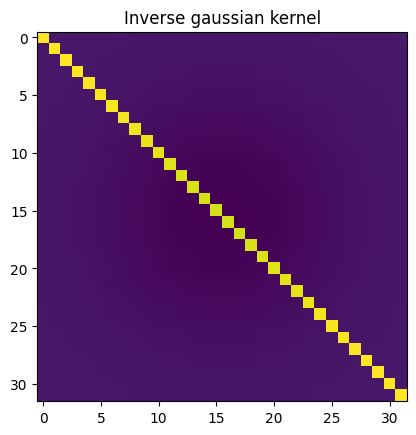

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# Image Deblurring:

#Gaussian
kernel_size = 32 #64
sigma = 8 # 32 # standard deviation
kernel1d = np.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
kernel1d = np.exp(-0.5 * (kernel1d / sigma) ** 2)
kernel1d = kernel1d / kernel1d.sum()
print(np.std(kernel1d), np.sum(kernel1d), kernel1d.shape)

matrix = np.outer(kernel1d, kernel1d)


print("det: ", np.linalg.det(matrix))
# since it is gaussian, it is singualr and has a determinant of 0,
# applying Ridge Regression,
alpha = 1e-5  # Regularization parameter
regularized_matrix = matrix + alpha * np.eye(matrix.shape[0])
matrix = regularized_matrix

print("reg det: ", np.linalg.det(matrix))
kernel = np.linalg.inv(matrix)

# NOTE: Outer is just $a \times a.T$
# outer = kernel1d.reshape(-1,1) @ (kernel1d.reshape(1,-1))
# print(matrix.shape)
plt.title("Inverse gaussian kernel")
plt.imshow(kernel)
#



honestly I am getting this,
I learnt that one simple way of deblurring an image was convollving it with an inverse gaussian,
However since a gaussian is singular, it has no inverse, so no kernel

So, I modified the gaussian slightly. however the modification is amplified in the inverse gaussian.

**Problem:**
- if there is no way of determining the inverse gaussian, it means no way of deblurring an image by this approach, right? or the modification should be applied on both blurring and deblurring the image for this to work. 

It seems like in using a gaussian, or a singular matrix in general, information is lost permanently and cannot be regained.


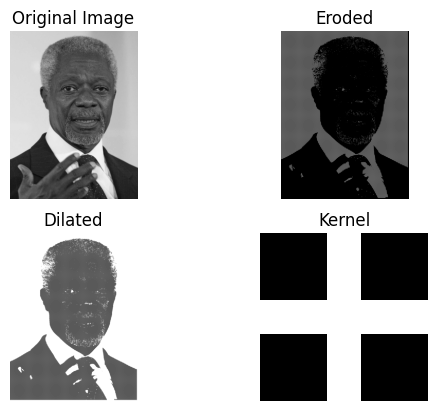

In [32]:
# Morphological Operations
import numpy as np

# Define the image
image = np.dot(img, np.ones(3)/3)
image = image[:, :image.shape[0]]
# Define the structuring element

def erode(image, kernel, stride=10, intensity=0.5):
    """
    Perform image erosion using a given structuring element.
    - stride: (pad_w, pad_h) padding in both directions
    - intensity: degree of erosion
    """
    # Get the dimensions of the image and kernel
    m, n = image.shape
    k_m, k_n = kernel.shape
    ratio = intensity * 255
    image = image // ratio

    eroded = np.zeros_like(image)
    for i in range(m-k_m):
        for j in range(n-k_n):
            if i % stride == 0 and j %stride == 0:
                win = image[i:i+k_m, j:j+k_n]
                assert kernel.shape == win.shape, f"shape: {kernel.shape}, {win.shape}"
                eroded_win = np.minimum(kernel, win)
                eroded[i:i+k_m, j:j+k_n] = eroded_win

    image *= ratio
    return eroded

def dilate(image, kernel, stride=10, intensity=0.5):
    """
    Perform image dilation using a given structuring element.
    - stride: (pad_w, pad_h) padding in both directions
    - intensity: degree of dilation
    """
    # Get the dimensions of the image and kernel
    m, n = image.shape
    k_m, k_n = kernel.shape
    ratio = intensity * 255

    image //= ratio

    dilated = np.ones_like(image) # zeros / ones, it does't matter
    for i in range(m-k_m):
        for j in range(n-k_n):
            if i % stride == 0 and j %stride == 0:
                win = image[i:i+k_m, j:j+k_n]
                assert kernel.shape == win.shape, f"shape: {kernel.shape}, {win.shape}"
                dilated_win = np.maximum(kernel, win)
                dilated[i:i+k_m, j:j+k_n] = dilated_win

    image *= ratio
    return dilated

kernel = np.zeros((10, 10), dtype=np.uint8)
k_m, k_n = kernel.shape
k_m //= 2
k_n //= 2
n= 1

kernel[k_m-n: k_m+n, :] = 1
kernel[:, k_n-n: k_n+n] = 1



# Display the results
import matplotlib.pyplot as plt


plt.subplot(221)
plt.axis("off")
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Apply erosion to remove noise
eroded = erode(image, kernel)
plt.subplot(222)
plt.axis("off")
plt.imshow(eroded, cmap='gray')
plt.title('Eroded')

# Apply erosion to remove noise
dilated = dilate(image, kernel)
plt.subplot(223)
plt.axis("off")
plt.imshow(dilated, cmap='gray')
plt.title('Dilated')

plt.subplot(224)
plt.axis("off")
plt.imshow(kernel, cmap='gray')
plt.title('Kernel')

# plt.subplot(144)
# plt.imshow(dilation, cmap='gray')
# plt.title('Dilation')

# Though in my implementation, I did not use convolution, it is just a nice thing to play around with,
# also I played with this around a bit, and one thing I noticed is despite the change in the kernel's percentage of 0 and 1's
# the eroded kenel looked just similar to the dilated just intensified. initially, I thought, the wwas to cut out the edges. well I dont know much,
# I should say. I need to research more into this.
plt.show()

In [14]:
# Image Pyramids

In [16]:
# Feature Extraction:-  image classification,

In [17]:
# opencv